In [1]:
# import Google earth engine module
import ee

#Authenticate the Google earth engine with google account
ee.Initialize()

#Pandas modules to interact data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
from itertools import groupby
import matplotlib.pyplot as plt
import ee
import folium
import time
import geopandas as gpd
import sklearn
import scipy
from sklearn.linear_model import LinearRegression
import progressbar
from time import sleep
from scipy.stats import pearsonr
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib

def plot_regression(O, P):
    O = np.array(O)
    P = np.array(P)
    plt.figure(figsize = (6, 6))
    plt.grid(zorder = 1)
    plt.scatter(O, P, edgecolor='black', linewidth=1, zorder = 2)
    corr, _ = pearsonr(O, P)
    regmodel = LinearRegression()
    regmodel.fit(O.values.reshape(-1,1), P)
    rsq = regmodel.score(O.values.reshape(-1,1), P)
    plt.plot(O.values.reshape(-1,1), regmodel.predict(O.values.reshape(-1,1)), color = 'orange', linestyle = '--', zorder = 3)
    plt.legend([u'Pearson R\u00b2: {:.3f} &\nPearson R: {:.3f}'.format(corr**2, corr), '1:1 Plot', 'Observed - Predicted'])

    plt.xlabel('VV')
    plt.ylabel('SM modelled')
    print(np.round(corr*100, 3), '%')
    return regmodel.intercept_, regmodel.coef_

    id longitude latitude precipitation
1    0     22.99    40.54       93.6777
2    1     22.99    40.54       11.8838
3    2     22.99    40.54       11.9714
4    3     22.99    40.54       33.9079
5    4     22.99    40.54       32.7342
6    5     22.99    40.54       32.8328
7    6     22.99    40.54       31.4208
8    7     22.99    40.54        5.0256
9    8     22.99    40.54       19.3447
10   9     22.99    40.54         19.42
11  10     22.99    40.54       63.7343
12  11     22.99    40.54       51.2662


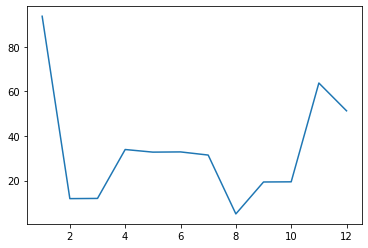

In [3]:
# import the RS products
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')
 
# Define time range
startyear = 2019
endyear = 2020

# Set date in ee date format
startdate = ee.Date.fromYMD(startyear,1,1)
enddate = ee.Date.fromYMD(endyear+1,12,31)

 
# create list for years
years = range(startyear,endyear);
 
# make a list with months
months = range(1,13)

#Filter to select Precipitation band
PrecipitationChirps = chirps.filterDate(startdate, enddate).sort('system:time_start', False).select("precipitation")
 
# Define geograpic 
point = ee.Geometry.Point([22.99, 40.54])
 
# calculate the monthly Sum
def MonthlySum(imageCollection):
    mylist = ee.List([])
    for y in years:
        for m in months:
            w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).sum()
            #mylist = mylist.add(w)
            mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
    return ee.ImageCollection.fromImages(mylist)
 
# run the calcMonthlyMean function
monthlyChirps = ee.ImageCollection(MonthlySum(PrecipitationChirps))


# select the region of interest, 25000 is the cellsize in meters
monthlyChirps = monthlyChirps.getRegion(point,1,"epsg:4326").getInfo()


# get january (index = 0)
precipiation = pd.DataFrame(monthlyChirps, columns = monthlyChirps[0])

# remove the first line
precipiation = precipiation[1:]

#to display the data
print(precipiation[['id','longitude','latitude','precipitation']])

plt.plot(precipiation.precipitation)

In [16]:
#Read AUTH Station data
auth = pd.read_excel(r"C:\Users\owner\Google Drive 2\Radiation Paper\Statgrahics\check_equations\auth.xlsx", skiprows = [1, 2], parse_dates = True, engine='openpyxl')
auth.index = auth.iloc[:, 1]
# auth = auth.drop(['Short Date'], axis = 1)
auth = auth.iloc[:, 12]
p = auth.loc['01-2008':].resample('M').sum()
p

Short Date 
2008-01-31    21.918311
2008-02-29    20.193871
2008-03-31    26.067831
2008-04-30    33.634751
2008-05-31    38.131839
                ...    
2020-06-30    53.147102
2020-07-31    66.318178
2020-08-31    69.277465
2020-09-30    53.718180
2020-10-31    39.056847
Freq: M, Name: ea, Length: 154, dtype: float64

In [25]:
np.shape(precipiation.precipitation)

(144,)